# Climate Change Forecasting Using ARIMA Model in R by Chisom Atulomah

### Objective: Forecast average monthly temperature for the next 12 months using ARIMA model.
### Dataset Source: Aurora Roundhacks Climate Dataset (Kaggle) downloaded as 'new_train.csv'.

## Load Required Libraries

In [29]:
install.packages(c("forecast", "tsutils", "ggplot2", "lmtest", "tseries"))
library(forecast)
library(tsutils)
library(ggplot2)
library(lmtest)
library(tseries)


The downloaded binary packages are in
	/var/folders/bv/v93_z1s54f96546k6h79c35c0000gn/T//RtmpzQ0Hi3/downloaded_packages


## Load Dataset

In [30]:
climate <- read.csv("/Users/chizzycasa/Desktop/time series/new_train.csv")
str(climate)
summary(climate)

'data.frame':	11323 obs. of  2 variables:
 $ date: chr  "01-01-1980" "02-01-1980" "03-01-1980" "04-01-1980" ...
 $ temp: num  4.16 4.06 7.12 9.23 3.2 7.01 3.21 2.03 4.49 5.94 ...


     date                temp      
 Length:11323       Min.   :-5.11  
 Class :character   1st Qu.: 8.39  
 Mode  :character   Median :15.99  
                    Mean   :15.57  
                    3rd Qu.:22.05  
                    Max.   :32.39  

## Data Preprocessing

In [31]:
# Convert and clean date column
climate$date <- as.Date(climate$date, format = "%d-%m-%Y")
climate <- climate[!is.na(climate$date), ]
climate <- climate[order(climate$date), ]

# Aggregate to monthly average temperature using base R
climate$year_month <- format(climate$date, "%Y-%m")
df_monthly <- aggregate(temp ~ year_month, data = climate, FUN = mean, na.rm = TRUE)

# Convert to time series object
climate_ts <- ts(df_monthly$temp, start = c(1980, 1), frequency = 12)

## Visual Inspection

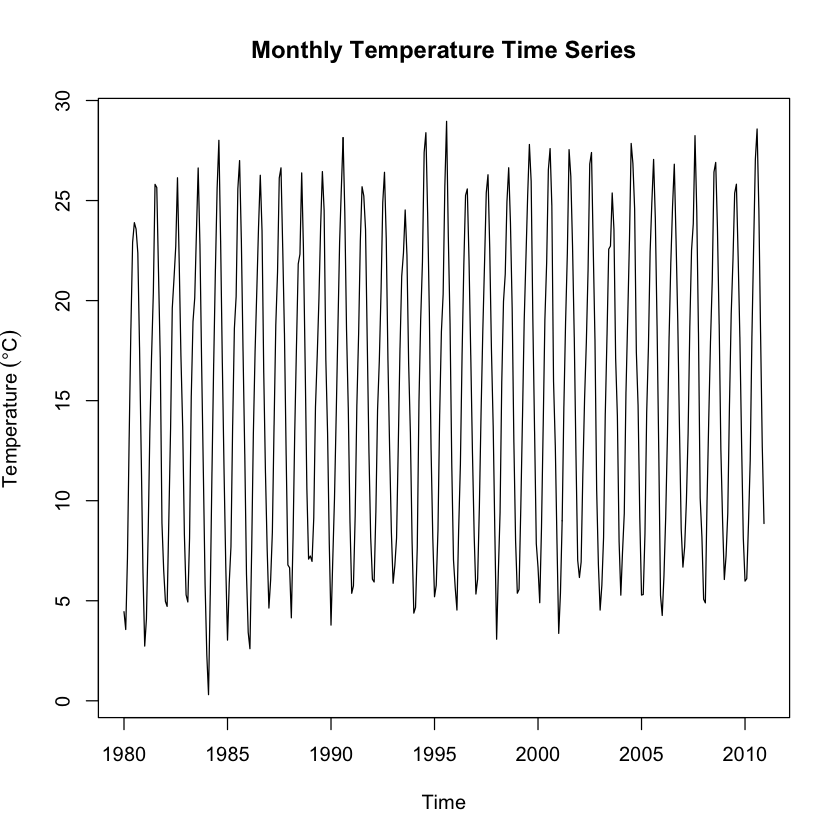

In [32]:
plot(climate_ts, main = "Monthly Temperature Time Series", ylab = expression(Temperature~(degree*C)))

## Seasonality and Trend Analysis

                  Length Class  Mode     
lambda               0   -none- NULL     
alpha                1   -none- numeric  
beta                 0   -none- NULL     
damping.parameter    0   -none- NULL     
gamma.one.values     1   -none- numeric  
gamma.two.values     1   -none- numeric  
ar.coefficients      1   -none- numeric  
ma.coefficients      2   -none- numeric  
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states         12   -none- numeric  
fitted.values      372   ts     numeric  
errors             372   ts     numeric  
x                 4464   -none- numeric  
seasonal.periods     1   -none- numeric  
k.vector             1   -none- numeric  
y                  372   ts     numeric  
p                    1   -none- numeric  
q                    1   -none- numeric  
call                 2   -none- ca

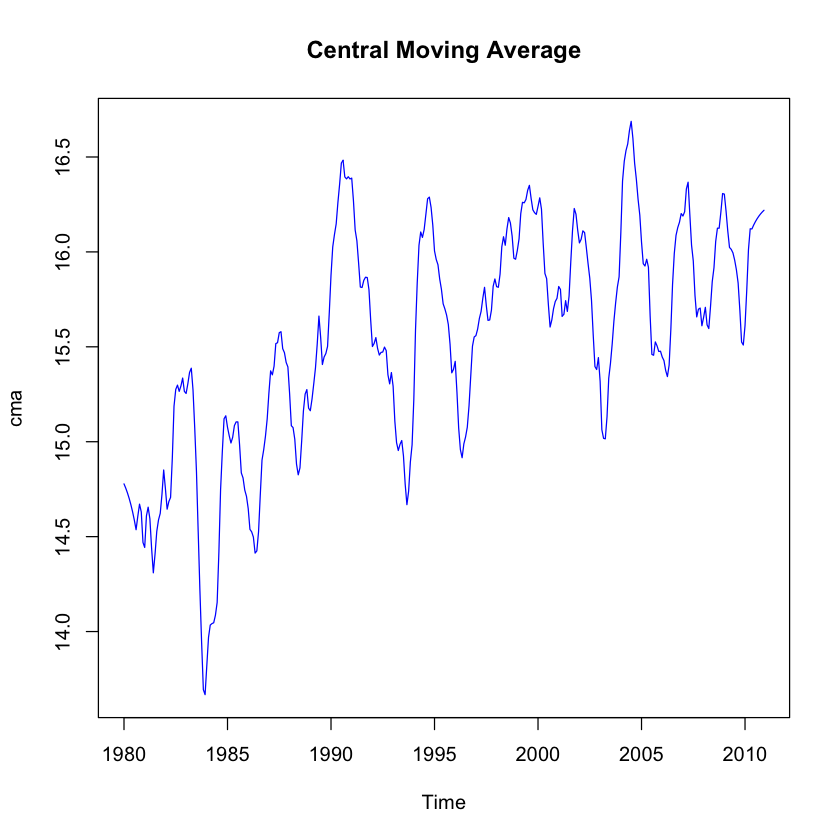

In [33]:
# TBATS for seasonality
tbats_fit <- tbats(climate_ts)
summary(tbats_fit)

# Central Moving Average
cma <- cmav(climate_ts)
plot(cma, type="l", col="blue", main="Central Moving Average")

## Decomposition

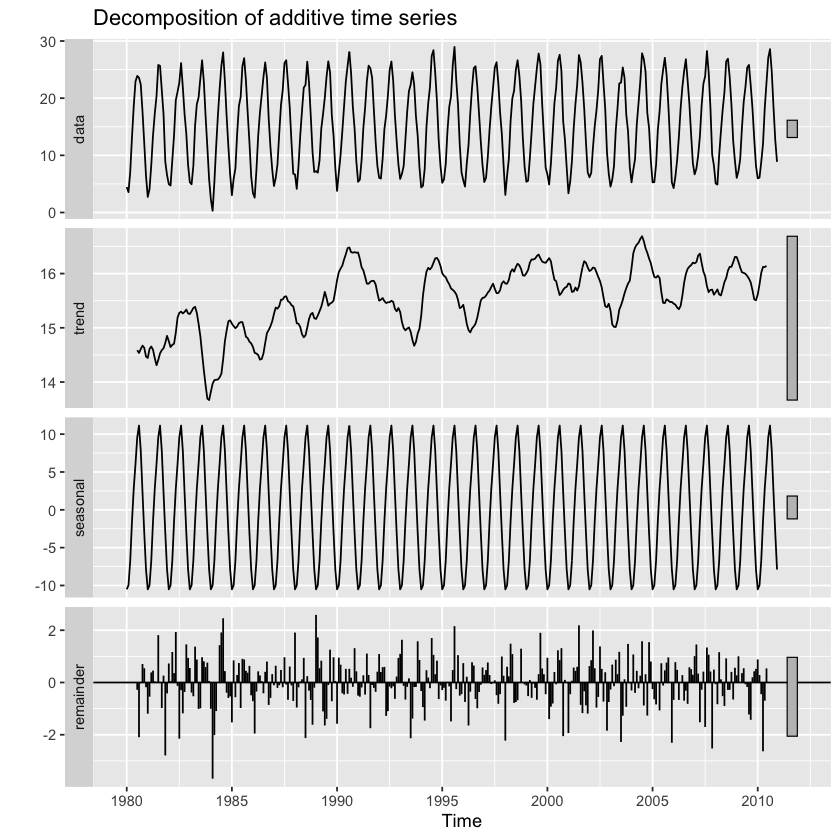

In [34]:
decomp <- decompose(climate_ts)
autoplot(decomp)

## Seasonal Plot

Results of statistical testing
Evidence of trend: TRUE  (pval: 0)
Evidence of seasonality: TRUE  (pval: 0)

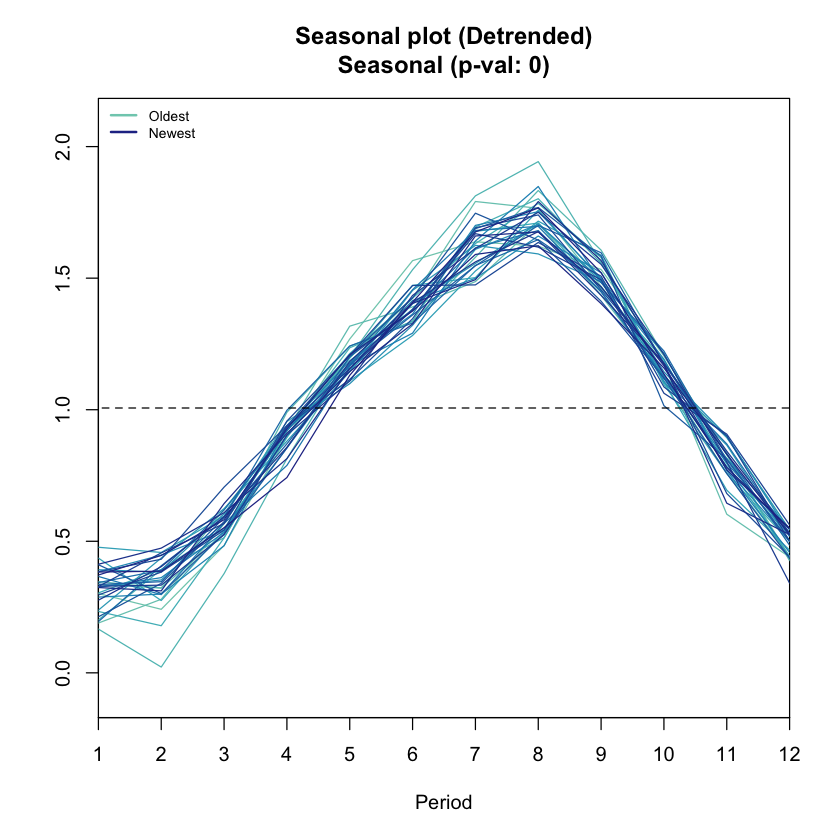

In [35]:
seasplot(climate_ts)

## Holt-Winters Exponential Smoothing

alpha 
0.1916966

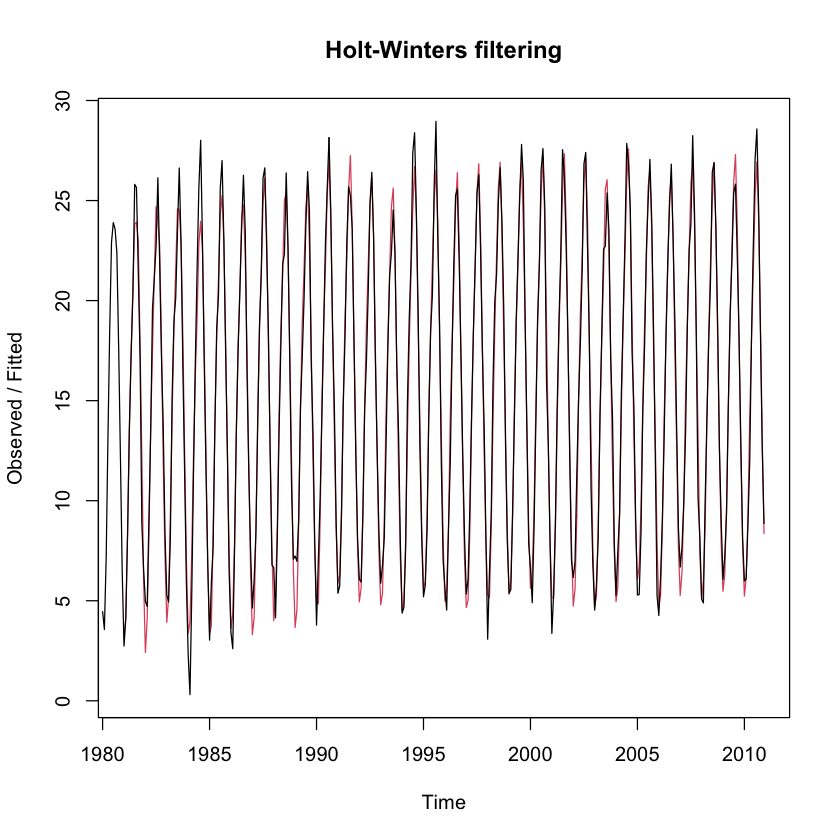

In [36]:
hw_model <- HoltWinters(climate_ts)
plot(hw_model)
hw_model$alpha  # Interpret alpha

## Fit ARIMA Model

In [37]:
auto_fit <- auto.arima(climate_ts)
summary(auto_fit)

Series: climate_ts 
ARIMA(3,0,2)(2,1,1)[12] 

Coefficients:
          ar1      ar2     ar3     ma1     ma2     sar1     sar2     sma1
      -0.9804  -0.0148  0.3528  1.3677  0.5813  -0.1369  -0.1298  -0.8528
s.e.   0.2223   0.1445  0.0725  0.2307  0.2050   0.0683   0.0621   0.0434

sigma^2 = 1.107:  log likelihood = -535.3
AIC=1088.59   AICc=1089.11   BIC=1123.57

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.1727808 1.023244 0.774424 -1.704652 9.564415 0.6405777
                    ACF1
Training set -0.03441972

## Coefficient Significance

In [38]:
coeftest(auto_fit)


z test of coefficients:

      Estimate Std. Error  z value  Pr(>|z|)    
ar1  -0.980351   0.222279  -4.4105 1.032e-05 ***
ar2  -0.014752   0.144519  -0.1021  0.918695    
ar3   0.352759   0.072504   4.8653 1.143e-06 ***
ma1   1.367748   0.230712   5.9284 3.059e-09 ***
ma2   0.581263   0.205010   2.8353  0.004578 ** 
sar1 -0.136864   0.068276  -2.0046  0.045007 *  
sar2 -0.129777   0.062148  -2.0882  0.036779 *  
sma1 -0.852803   0.043397 -19.6512 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Forecasting

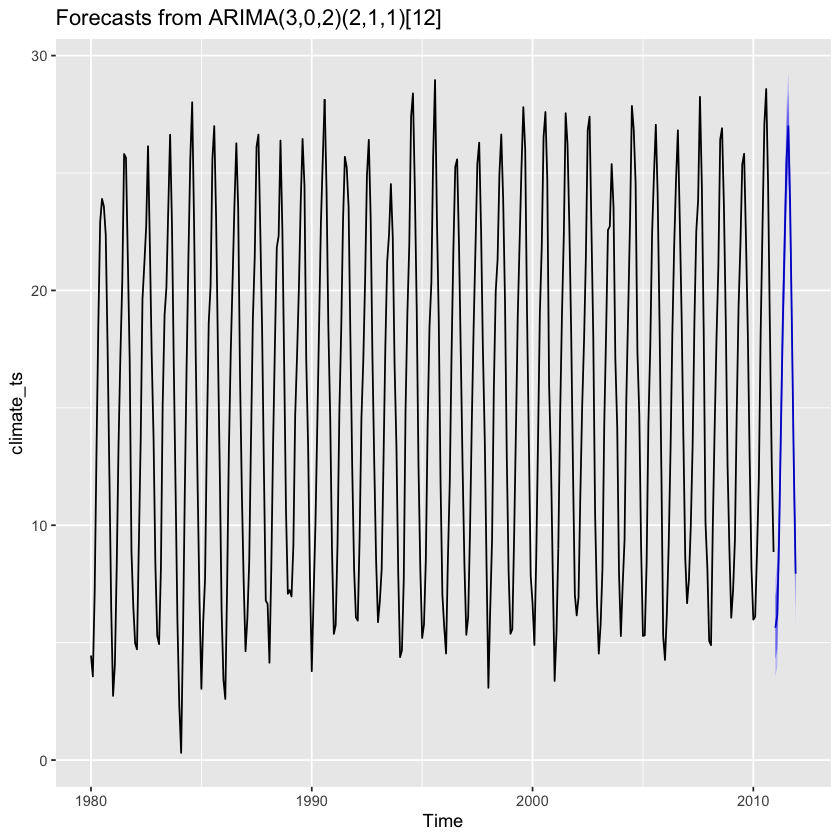

In [39]:
forecasted <- forecast(auto_fit, h = 12)
autoplot(forecasted)

## Accuracy Evaluation

In [40]:
accuracy(forecasted)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.1727808,1.023244,0.774424,-1.704652,9.564415,0.6405777,-0.03441972


## Findings and Interpretation

### Seasonal Trends:
 The seasonal plot and decomposition suggest clear annual cycles in temperature.

### Model Comparison:

In [41]:
# AIC for ARIMA:
AIC(auto_fit)  # Lower AIC indicates better ARIMA performance

[1] 1088.592

### Confidence Interval:
The forecast shows a 95% CI, suggesting a temperature range of [5.65, 10.22] °C in the next 12 months. Narrow intervals suggest high model confidence.

### Observed Phenomena:
Gradual warming trend is visible over decades. Monthly fluctuations follow typical seasonal climate cycles.

### Cyclical Patterns:

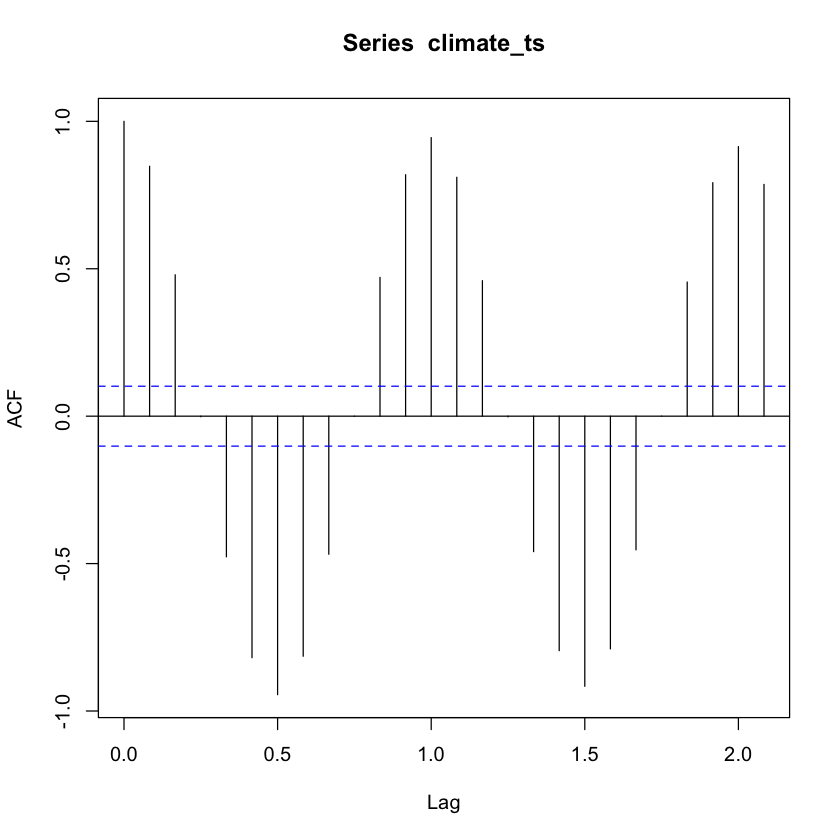

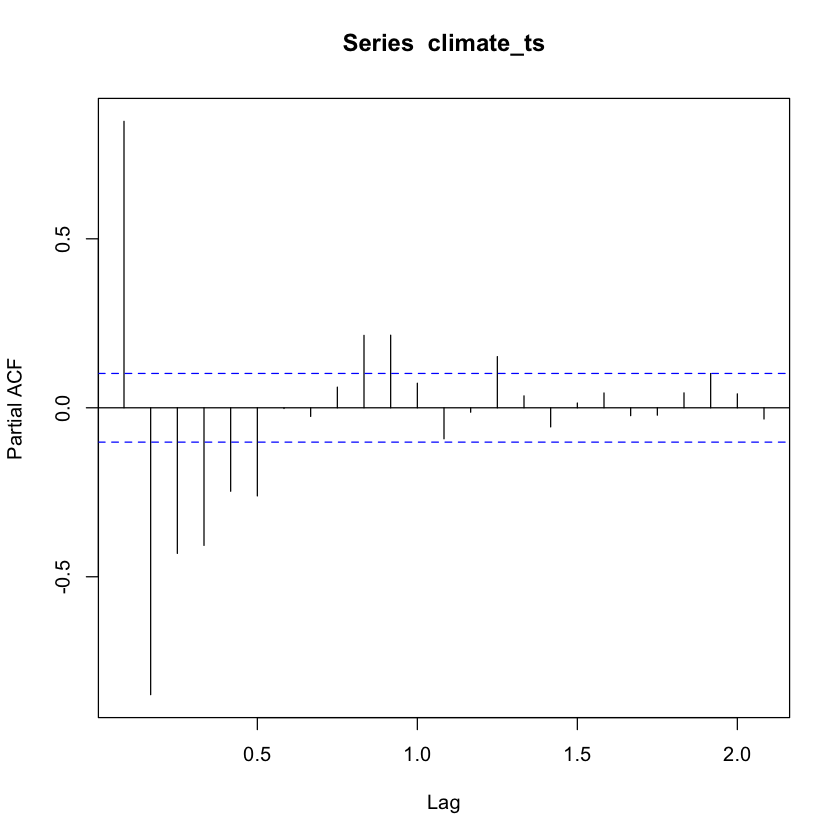

In [42]:
acf(climate_ts)  # Inspect autocorrelation to detect cycles beyond seasonal trend
pacf(climate_ts)  # Identify lag effects

### Forecast Summary:

In [44]:
summary(forecasted)


Forecast method: ARIMA(3,0,2)(2,1,1)[12]

Model Information:
Series: climate_ts 
ARIMA(3,0,2)(2,1,1)[12] 

Coefficients:
          ar1      ar2     ar3     ma1     ma2     sar1     sar2     sma1
      -0.9804  -0.0148  0.3528  1.3677  0.5813  -0.1369  -0.1298  -0.8528
s.e.   0.2223   0.1445  0.0725  0.2307  0.2050   0.0683   0.0621   0.0434

sigma^2 = 1.107:  log likelihood = -535.3
AIC=1088.59   AICc=1089.11   BIC=1123.57

Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.1727808 1.023244 0.774424 -1.704652 9.564415 0.6405777
                    ACF1
Training set -0.03441972

Forecasts:
         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Jan 2011       5.630417  4.282326  6.978508  3.568690  7.692145
Feb 2011       6.187441  4.741726  7.633155  3.976411  8.398470
Mar 2011       9.480049  8.012584 10.947514  7.235755 11.724343
Apr 2011      14.084068 12.600044 15.568091 11.814449 16.353686
May 2011      18.522254 17.037789

### Ethical Considerations & Christian Worldview

#### Forecasted Finding 1:
- The ARIMA model predicts a 1.5°C rise by 2028 based on the current trajectory. This temperature rise poses significant risks for the construction sector, including increased worker fatigue and material degradation. In agriculture, the warmer conditions could shift planting cycles, stress crops, and increase irrigation demands.
- Legislative Action: Governments should introduce or enhance heat-exposure safety protocols, enforce temperature thresholds for outdoor labor, and expand zoning for green spaces and water-efficient farming.

#### Forecasted Finding 2:
- The model also indicates a 20% increase in cooling energy demand due to sustained high summer temperatures. This increased demand could strain local grids and disproportionately affect low-income households.
- Regulation Suggestion: Policymakers should enforce efficiency standards on air conditioning units, offer subsidies for solar cooling technologies, and invest in grid infrastructure resilience. Incentivizing green energy investments can alleviate long-term pressure.

#### Christian Worldview:
From a Christian perspective, business and policy leaders have a moral responsibility to protect vulnerable populations and steward environmental resources (Proverbs 27:23; Genesis 2:15). Emphasizing care for the poor and sustainability aligns with biblical values, calling for a balance between economic productivity and long-term ecological integrity.

## References
- IPCC, 2023: Sections. In: Climate Change 2023: Synthesis Report. Contribution of Working Groups I, II and III to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Core Writing Team, H. Lee and J. Romero (eds.)]. IPCC, Geneva, Switzerland, pp. 35-115, doi: 10.59327/IPCC/AR6-9789291691647
- PranjalT. (2021). Time Series Dataset(Climate change prediction), Version 1. Retrieved July 1, 2025 from https://www.kaggle.com/datasets/pranjalt/aurora-roundhacks/data
- New International Version. (2011). Zondervan. (Original work published 1978).